In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 18, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 9999


from datetime import datetime
str(datetime.now())




'2018-08-09 11:25:00.717582'

In [2]:
df = pd.read_csv('../../measurements/Excel Files/task 3/Western Basin/detroitriver_single_point.csv', encoding="ISO-8859-1")
mdf = pd.read_csv('../../measurements/Excel Files/task 3/Western Basin/maumee_single.csv', encoding="ISO-8859-1", skiprows=35)


In [3]:
mdf.head()

,agency_cd,site_no,datetime,109477_00060_00003,109477_00060_00003_cd,109480_80154_00003,109480_80154_00003_cd,109481_80155_00003,109481_80155_00003_cd,232942_00665_00003,232942_00665_00003_cd,232943_91007_00003,232943_91007_00003_cd
0,USGS,4193500,1982-07-01,5500.0,A,73,A,1080,A,,,,NaN
1,USGS,4193500,1982-07-02,4050.0,A,57,A,623,A,,,,NaN
2,USGS,4193500,1982-07-03,6880.0,A,89,A,1650,A,,,,NaN
3,USGS,4193500,1982-07-04,19300.0,A,230,A,12000,A,,,,NaN
4,USGS,4193500,1982-07-05,16000.0,A,192,A,8290,A,,,,NaN


In [4]:
df.head()

,Date,"Discharge, cu feet per s"
0,2008-10-01,204000.0
1,2008-10-02,204000.0
2,2008-10-03,198000.0
3,2008-10-04,198000.0
4,2008-10-05,195000.0


In [5]:
df = df[pd.to_numeric(df['Discharge, cu feet per s'].notnull(), errors='coerce')]
mdf = mdf[pd.to_numeric(mdf[' 109477_00060_00003'].notnull(), errors='coerce')]

In [6]:
# df=df.astype(float,  errors='ignore')
# df=df[pd.to_numeric(df['Year'].notnull(), errors='coerce')]

In [16]:
df['Date'] = df.apply(lambda x:datetime.strptime("{0}".format(x['Date']), "%Y-%m-%d %H:%M:%S"),axis=1)
mdf['Date'] = mdf.apply(lambda x:datetime.strptime("{0} 00:00:00".format(x[' datetime']), " %Y-%m-%d %H:%M:%S"),axis=1)

In [17]:
df['Cu.m'] = df['Discharge, cu feet per s']*0.0283168*60*60*24
mdf['Cu.m'] = mdf[' 109477_00060_00003']*0.0283168*60*60*24

In [18]:
df.describe()

,"Discharge, cu feet per s",Cu.m
count,2352.000000,2.352000e+03
mean,183159.438776,4.481127e+08
std,17891.839249,4.377366e+07
min,108000.000000,2.642297e+08
25%,174000.000000,4.257034e+08
50%,185000.000000,4.526157e+08
75%,195000.000000,4.770814e+08
max,228000.000000,5.578183e+08


In [19]:
mdf.describe()

,site_no,109477_00060_00003,Cu.m
count,13180.0,13180.000000,1.318000e+04
mean,4193500.0,5940.249241,1.453324e+07
std,0.0,9333.800499,2.283581e+07
min,4193500.0,17.000000,4.159172e+04
25%,4193500.0,828.000000,2.025761e+06
50%,4193500.0,2240.000000,5.480320e+06
75%,4193500.0,6610.000000,1.617184e+07
max,4193500.0,94100.000000,2.302224e+08


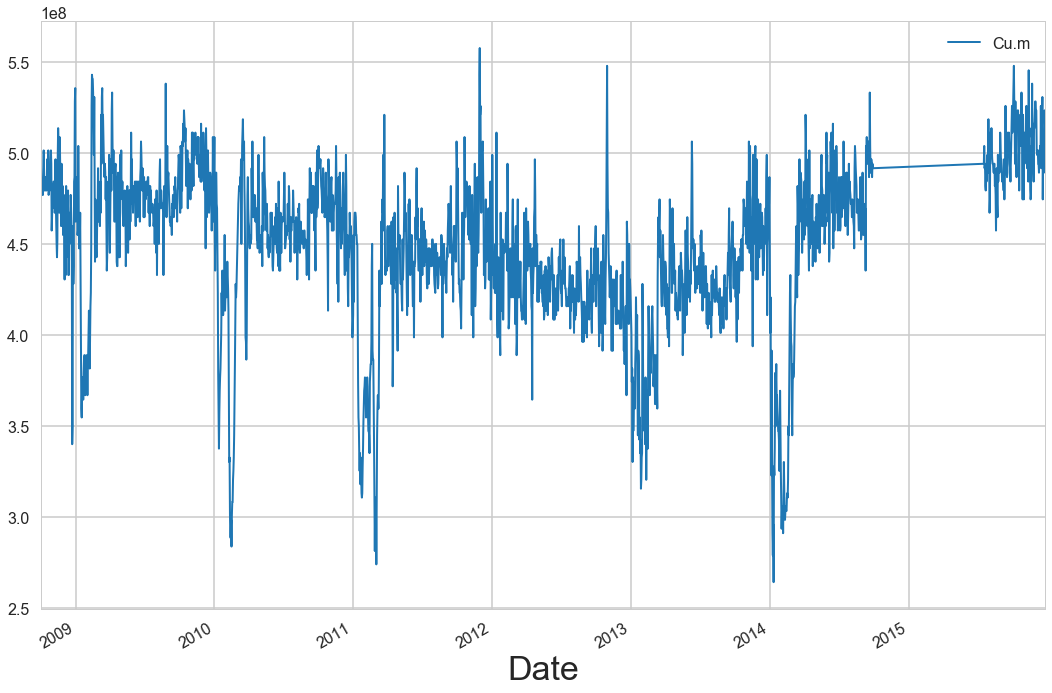

In [20]:
df.plot(y='Cu.m', x='Date')

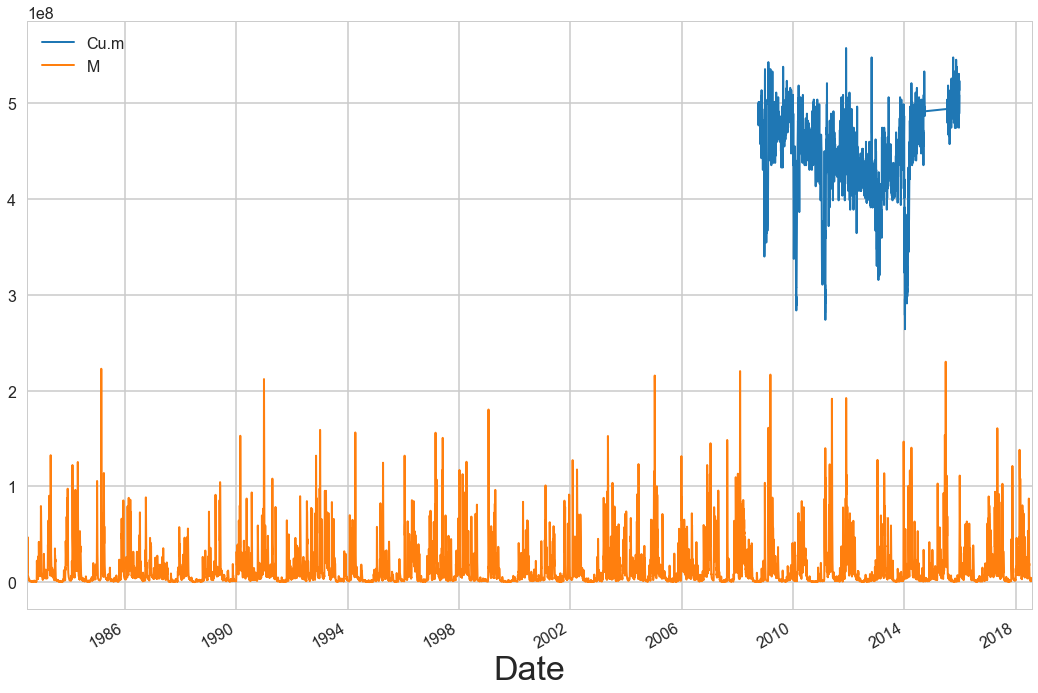

In [21]:
ax = plt.subplot()
df.plot(y='Cu.m', x='Date', ax=ax)
mdf.plot(x='Date', y='Cu.m', ax=ax, label='M')

In [22]:
df.set_index('Date', inplace=True)
x2= pd.date_range('1983-04-01','2015-12-31',freq='D')

In [23]:
df=df.reindex(x2)

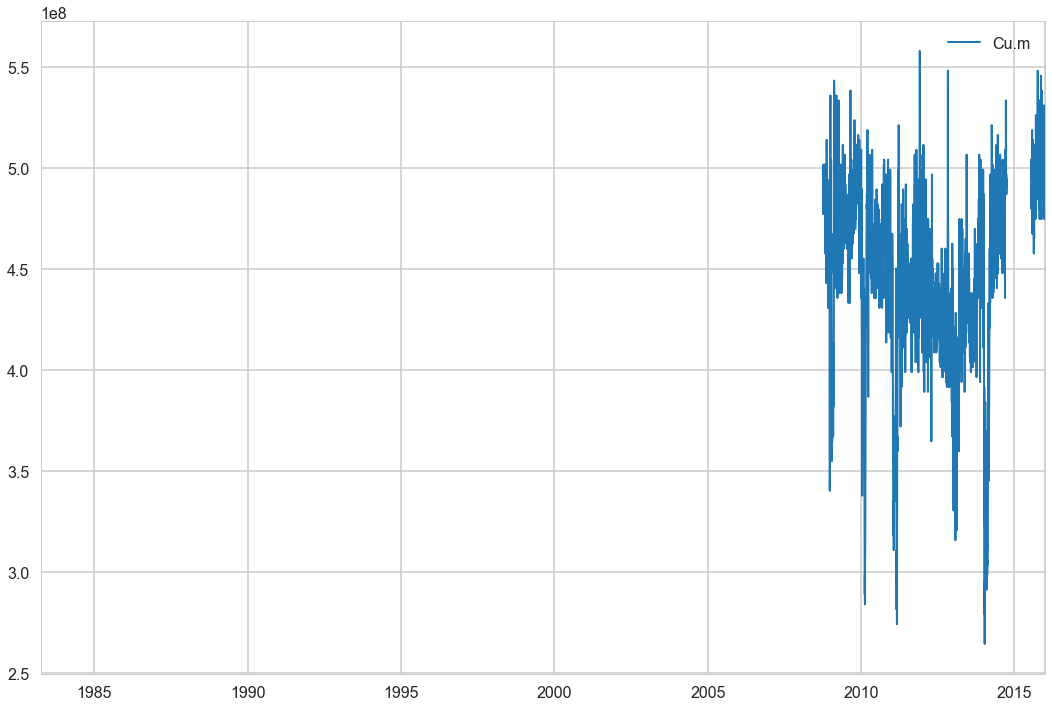

In [26]:
df.plot(y='Cu.m')

In [27]:
df.describe()

,"Discharge, cu feet per s",Cu.m
count,2352.000000,2.352000e+03
mean,183159.438776,4.481127e+08
std,17891.839249,4.377366e+07
min,108000.000000,2.642297e+08
25%,174000.000000,4.257034e+08
50%,185000.000000,4.526157e+08
75%,195000.000000,4.770814e+08
max,228000.000000,5.578183e+08


In [28]:
mdf.describe()

,site_no,109477_00060_00003,Cu.m
count,13180.0,13180.000000,1.318000e+04
mean,4193500.0,5940.249241,1.453324e+07
std,0.0,9333.800499,2.283581e+07
min,4193500.0,17.000000,4.159172e+04
25%,4193500.0,828.000000,2.025761e+06
50%,4193500.0,2240.000000,5.480320e+06
75%,4193500.0,6610.000000,1.617184e+07
max,4193500.0,94100.000000,2.302224e+08


In [ ]:
df['Cu.m'] = df['Cu.m'].interpolate(method='linear', limit=61)

In [ ]:
df.plot(y='Cu.m')

In [ ]:
df.head()

In [52]:
mdf_pp = pd.read_csv('../../measurements/Excel Files/task 3/Western Basin/maumeeriver_average.csv', skiprows=0,  encoding="ISO-8859-1")


In [53]:
mdf_pp.describe()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]"
count,13540.000000,13540.000000,13540.000000,1.354000e+04,5994.000000,8.280000e+03,558.000000,3253.000000,245.000000,558.000000,5.0000,169.000000,74.000000,5538.000000,33.000000,579.000000,347.000000,0.0,260.000000,3312.000000,0.0,0.0,51.000000,237.000000,9.000000,11.000000,219.000000,15.000000
mean,1998.035081,6.512482,15.725332,1.374651e+07,13.374920,8.409676e+04,72.790323,246.418562,71.959184,222.969534,37.3200,7369.763314,54.459459,10659.444465,24862.151515,100.190415,61054.178674,NaN,58830.384615,8.146863,NaN,NaN,38.431373,6408.481013,2264.444444,2282.727273,37.269863,226800.000000
std,10.699373,3.453862,8.798839,2.191189e+07,9.449523,1.236383e+05,60.931637,192.457537,53.496729,186.951488,15.2775,1704.619408,59.475836,2509.107705,11400.628503,129.546232,25710.511921,NaN,14991.562616,0.407698,NaN,NaN,47.639167,31671.987687,3368.174992,3111.488682,55.681714,161717.213502
min,1980.000000,1.000000,1.000000,1.345617e+05,-0.100000,1.000000e+03,4.000000,8.000000,10.000000,11.000000,18.9000,4500.000000,30.000000,4300.000000,171.000000,9.000000,10100.000000,NaN,17000.000000,7.000000,NaN,NaN,10.000000,10.000000,340.000000,340.000000,0.000000,5000.000000
25%,1989.000000,4.000000,8.000000,1.947474e+06,4.100000,2.300000e+04,20.000000,140.000000,20.000000,55.000000,29.9000,6440.000000,30.000000,8600.000000,15300.000000,26.000000,42750.000000,NaN,47150.000000,7.800000,NaN,NaN,10.000000,1700.000000,650.000000,600.000000,10.000000,102000.000000
50%,1998.000000,7.000000,16.000000,5.198973e+06,13.300000,4.100000e+04,66.000000,197.000000,70.000000,202.000000,31.5000,7100.000000,30.000000,10700.000000,24900.000000,52.000000,58000.000000,NaN,58750.000000,8.200000,NaN,NaN,20.000000,5030.000000,960.000000,990.000000,19.000000,220000.000000
75%,2007.000000,10.000000,23.000000,1.519629e+07,22.500000,8.700000e+04,111.000000,278.000000,110.000000,344.625000,51.7000,7860.000000,47.500000,12700.000000,34200.000000,117.500000,76000.000000,NaN,68975.000000,8.400000,NaN,NaN,40.000000,6700.000000,2200.000000,2400.000000,36.400000,352500.000000
max,2017.000000,12.000000,31.000000,2.566458e+08,31.300000,1.880000e+06,402.000000,4600.000000,350.000000,1230.000000,54.6000,15900.000000,390.000000,20000.000000,49100.000000,1200.000000,160000.000000,NaN,99000.000000,9.400000,NaN,NaN,230.000000,490000.000000,11000.000000,11000.000000,378.000000,514000.000000


In [57]:
mdf_pp['Date'] = mdf_pp.apply(lambda x:datetime.strptime("{0}-{1}-{2} 00:00:00".format(int(x['Year']), int(x['Month']), int(x['Day'])), "%Y-%m-%d %H:%M:%S"),axis=1)

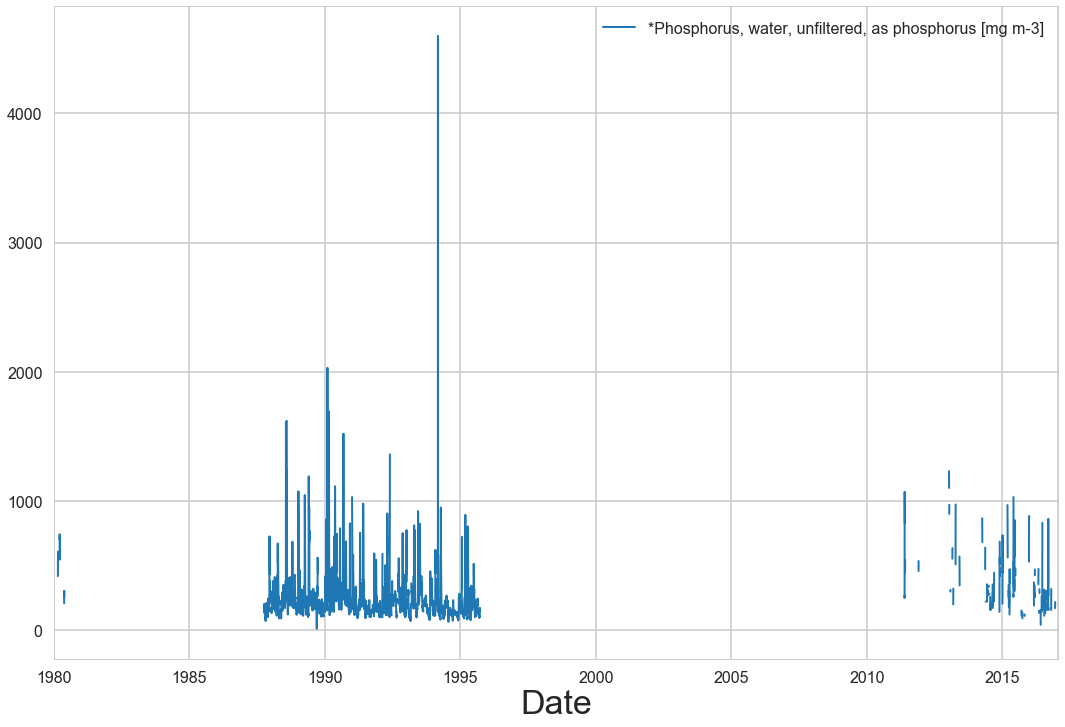

In [63]:
mdf_pp.plot(y='*Phosphorus, water, unfiltered, as phosphorus [mg m-3]', x='Date')

In [76]:
mdf_pp['P_load mt-P/year'] = mdf_pp['Inflow volume [m3 d-1]']*mdf_pp['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']*365/1000/1000/1000

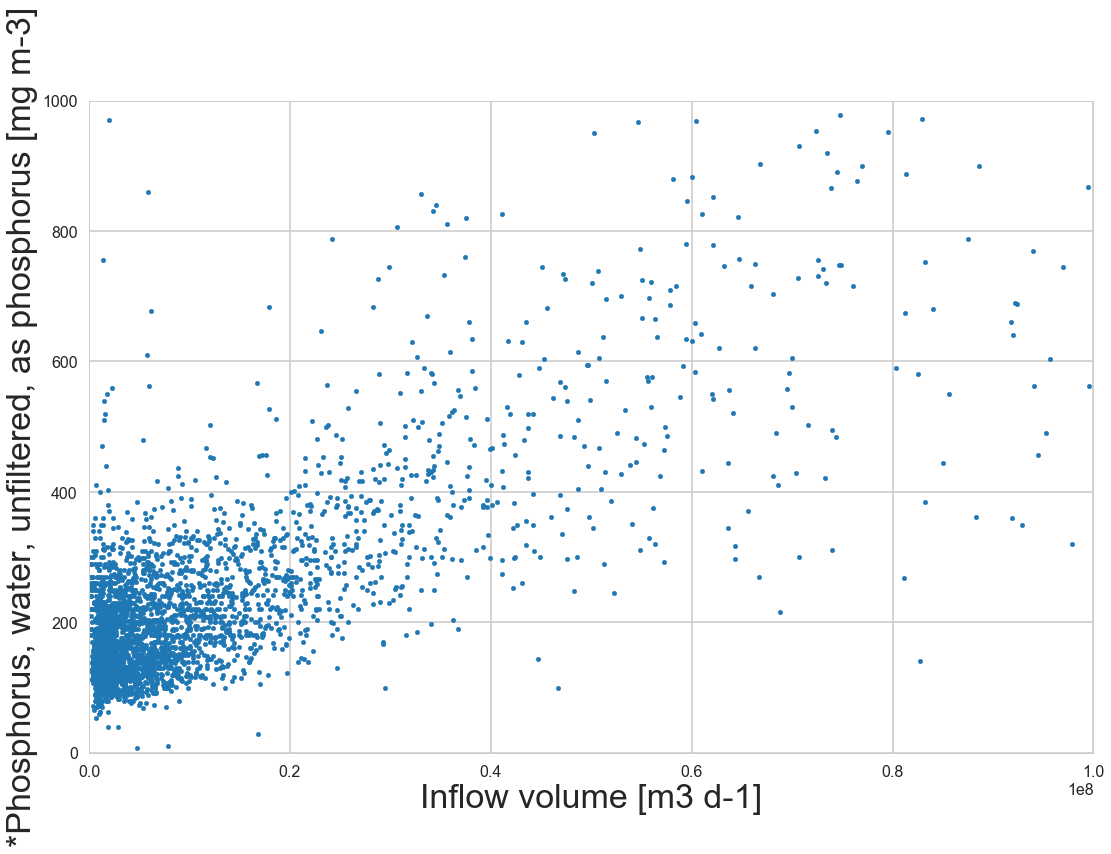

In [86]:
mdf_pp.plot(y='*Phosphorus, water, unfiltered, as phosphorus [mg m-3]', x='Inflow volume [m3 d-1]', kind='scatter', xlim=[0,1e+8],ylim=[0,1000])

In [78]:
mdf_pp['P_load mt-P/year'].mean()

2100.5477788541884